In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("restaurant_food_quality 1.xlsx")

In [3]:
df.head()

,Servings,Temperature_C,Prep_Time_Min,Cost_Per_Plate,Chef_Experience_Years,Cuisine,Restaurant_Type,Chef_Level,Location,Food_Quality
0,2,68.056181,35,1481,4,Indian,Casual,Mid,Highway,Medium
1,4,78.146347,13,621,8,Indian,Cafe,Senior,Highway,Low
2,3,78.006338,38,1202,12,Thai,Fast Food,Junior,Suburban,High
3,1,77.061580,19,764,21,Indian,Cafe,Mid,Mall,Medium
4,2,77.960124,20,1036,20,Italian,Fast Food,Mid,Suburban,High


In [4]:
df.tail()

,Servings,Temperature_C,Prep_Time_Min,Cost_Per_Plate,Chef_Experience_Years,Cuisine,Restaurant_Type,Chef_Level,Location,Food_Quality
995,1,86.281453,12,190,7,Indian,Fast Food,Junior,Highway,Low
996,4,83.618138,18,785,14,Mexican,Casual,Senior,Mall,Low
997,3,66.713436,34,676,8,Italian,Fast Food,Master,Highway,Medium
998,2,63.259781,35,402,16,Thai,Fine Dining,Junior,Suburban,High
999,1,79.386201,39,345,18,Indian,Fine Dining,Master,Highway,Medium


In [5]:
df.shape

(1000, 10)

In [6]:
df.dtypes

Servings                   int64
Temperature_C            float64
Prep_Time_Min              int64
Cost_Per_Plate             int64
Chef_Experience_Years      int64
Cuisine                   object
Restaurant_Type           object
Chef_Level                object
Location                  object
Food_Quality              object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Servings               1000 non-null   int64  
 1   Temperature_C          1000 non-null   float64
 2   Prep_Time_Min          1000 non-null   int64  
 3   Cost_Per_Plate         1000 non-null   int64  
 4   Chef_Experience_Years  1000 non-null   int64  
 5   Cuisine                1000 non-null   object 
 6   Restaurant_Type        1000 non-null   object 
 7   Chef_Level             1000 non-null   object 
 8   Location               1000 non-null   object 
 9   Food_Quality           1000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [8]:
df.columns

Index(['Servings', 'Temperature_C', 'Prep_Time_Min', 'Cost_Per_Plate',
       'Chef_Experience_Years', 'Cuisine', 'Restaurant_Type', 'Chef_Level',
       'Location', 'Food_Quality'],
      dtype='object')

In [9]:
df.describe()

,Servings,Temperature_C,Prep_Time_Min,Cost_Per_Plate,Chef_Experience_Years
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2.513000,77.437247,22.350000,825.533000,12.71500
std,1.114034,10.237773,10.240624,399.025383,7.06312
min,1.000000,60.006358,5.000000,102.000000,1.00000
25%,2.000000,68.145527,13.000000,490.750000,7.00000
50%,3.000000,77.935160,22.000000,835.000000,13.00000
75%,4.000000,86.321767,31.000000,1160.500000,19.00000
max,4.000000,94.981365,39.000000,1499.000000,24.00000


In [10]:
df.isnull().sum()

Servings                 0
Temperature_C            0
Prep_Time_Min            0
Cost_Per_Plate           0
Chef_Experience_Years    0
Cuisine                  0
Restaurant_Type          0
Chef_Level               0
Location                 0
Food_Quality             0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Non-Visual Analysis

In [12]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [13]:
discrete_data = df.select_dtypes(include=['object'])
discrete_univariate_analysis(discrete_data)


********** Cuisine **********
count                                           1000
nunique                                            5
unique     [Indian, Thai, Italian, Chinese, Mexican]
Name: Cuisine, dtype: object
Value Counts: 
 Cuisine
Mexican    224
Italian    205
Indian     199
Thai       194
Chinese    178
Name: count, dtype: int64

********** Restaurant_Type **********
count                                        1000
nunique                                         4
unique     [Casual, Cafe, Fast Food, Fine Dining]
Name: Restaurant_Type, dtype: object
Value Counts: 
 Restaurant_Type
Fast Food      259
Cafe           258
Fine Dining    252
Casual         231
Name: count, dtype: int64

********** Chef_Level **********
count                               1000
nunique                                4
unique     [Mid, Senior, Junior, Master]
Name: Chef_Level, dtype: object
Value Counts: 
 Chef_Level
Mid       267
Junior    252
Senior    244
Master    237
Name: count, dtype: int64

In [14]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [15]:
num_df = df.select_dtypes(include=['int',"float"])

numerical_univariate_analysis(num_df)

********** Servings **********
count     1000.000000
min          1.000000
max          4.000000
mean         2.513000
median       3.000000
std          1.114034
skew        -0.013135
Name: Servings, dtype: float64

********** Temperature_C **********
count     1000.000000
min         60.006358
max         94.981365
mean        77.437247
median      77.935160
std         10.237773
skew        -0.007504
Name: Temperature_C, dtype: float64

********** Prep_Time_Min **********
count     1000.000000
min          5.000000
max         39.000000
mean        22.350000
median      22.000000
std         10.240624
skew        -0.047238
Name: Prep_Time_Min, dtype: float64

********** Cost_Per_Plate **********
count     1000.000000
min        102.000000
max       1499.000000
mean       825.533000
median     835.000000
std        399.025383
skew        -0.074707
Name: Cost_Per_Plate, dtype: float64

********** Chef_Experience_Years **********
count     1000.000000
min          1.000000
max         

## Univariate Analysis 

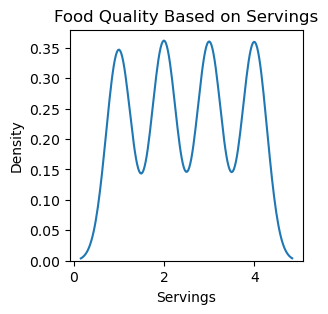

In [16]:
plt.figure  (figsize = (3,3))
sns.kdeplot(data=df, x='Servings')
plt.title("Food Quality Based on Servings")
plt.show()

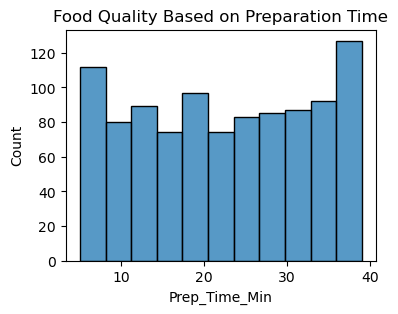

In [17]:
plt.figure  (figsize = (4,3))
sns.histplot(data=df, x='Prep_Time_Min')
plt.title("Food Quality Based on Preparation Time")
plt.show()

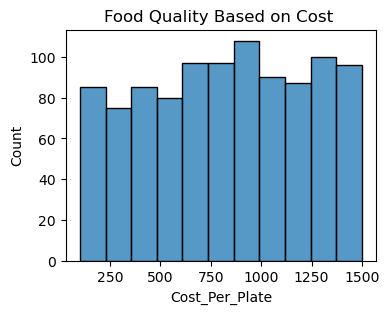

In [18]:
plt.figure  (figsize = (4,3))
sns.histplot(data=df, x='Cost_Per_Plate')
plt.title("Food Quality Based on Cost ")
plt.show()

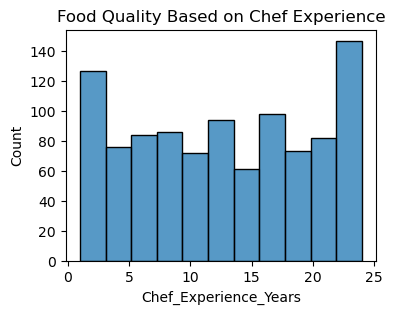

In [19]:
plt.figure  (figsize = (4,3))
sns.histplot(data=df, x='Chef_Experience_Years')
plt.title("Food Quality Based on Chef Experience")
plt.show()

## Bivariate Analysis: Categorical Vs Categorical

In [20]:
cat = df.select_dtypes(include=["object"])

In [21]:
cat.columns

Index(['Cuisine', 'Restaurant_Type', 'Chef_Level', 'Location', 'Food_Quality'], dtype='object')

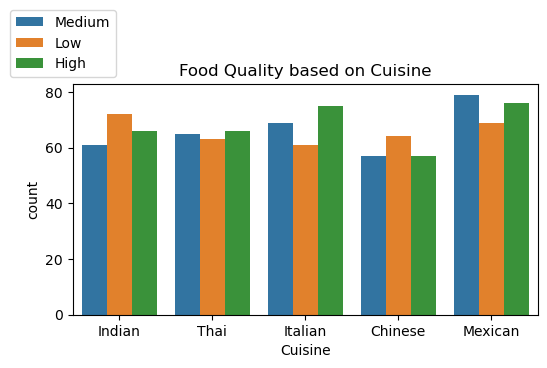

In [22]:
plt.figure (figsize = (6,3))
sns.countplot(data=df, x ="Cuisine",hue = "Food_Quality")
plt.title("Food Quality based on Cuisine")
plt.legend(loc="lower left",bbox_to_anchor=(-0.15,1))
plt.show()

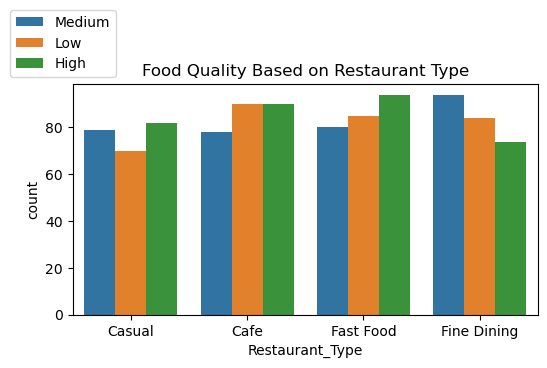

In [23]:
plt.figure (figsize = (6,3))
sns.countplot(data=df, x ="Restaurant_Type",hue= "Food_Quality")
plt.title("Food Quality Based on Restaurant Type")
plt.legend(loc="lower left",bbox_to_anchor=(-0.15,1))
plt.show()

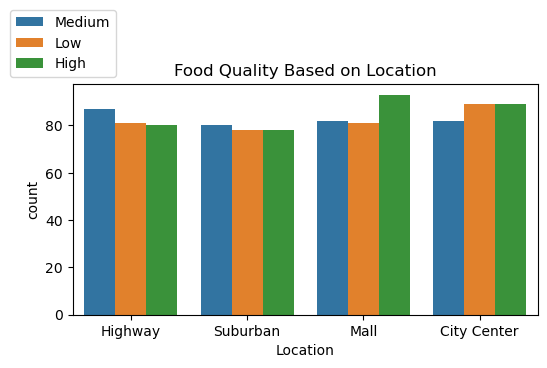

In [24]:
plt.figure (figsize = (6,3))
sns.countplot(data=df, x ="Location",hue= "Food_Quality")
plt.title("Food Quality Based on Location")
plt.legend(loc="lower left",bbox_to_anchor=(-0.15,1))
plt.show()

## Bivariate Analysis Numerical Vs Categorical

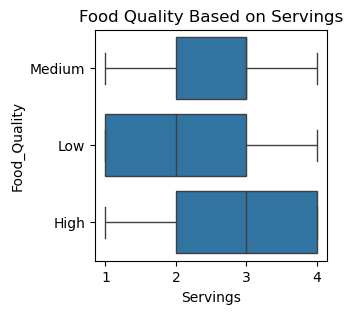

In [25]:
plt.figure (figsize = (3,3))
sns.boxplot(data = df, x = "Servings", y ="Food_Quality")
plt.title("Food Quality Based on Servings")
plt.show()

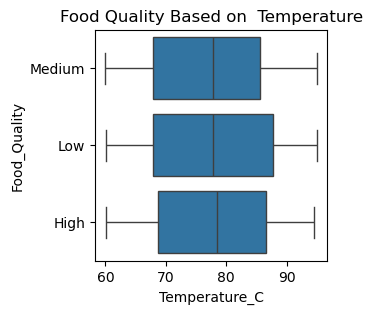

In [26]:
plt.figure (figsize = (3,3))
sns.boxplot(data=df, y ="Food_Quality", x="Temperature_C")
plt.title("Food Quality Based on  Temperature")
plt.show()

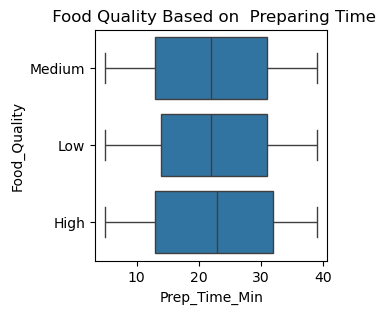

In [33]:
plt.figure (figsize = (3,3))
sns.boxplot(data=df, y ="Food_Quality", x="Prep_Time_Min")
plt.title(" Food Quality Based on  Preparing Time")
plt.show()

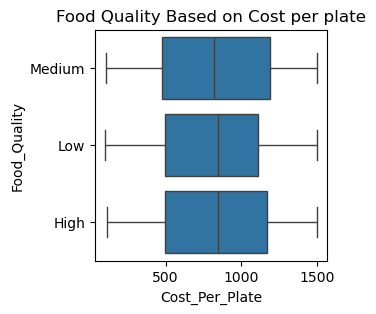

In [28]:
plt.figure (figsize = (3,3))
sns.boxplot(data=df, y ="Food_Quality", x="Cost_Per_Plate")
plt.title("Food Quality Based on Cost per plate")
plt.show()

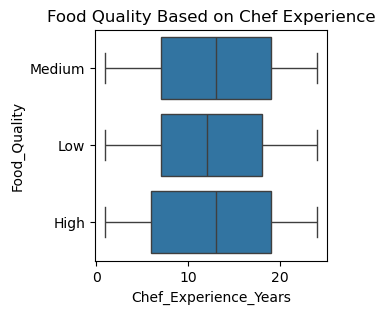

In [29]:
plt.figure (figsize = (3,3))
sns.boxplot(data=df, y ="Food_Quality", x="Chef_Experience_Years")
plt.title("Food Quality Based on Chef Experience")
plt.show()

In [30]:
cat.columns

Index(['Cuisine', 'Restaurant_Type', 'Chef_Level', 'Location', 'Food_Quality'], dtype='object')

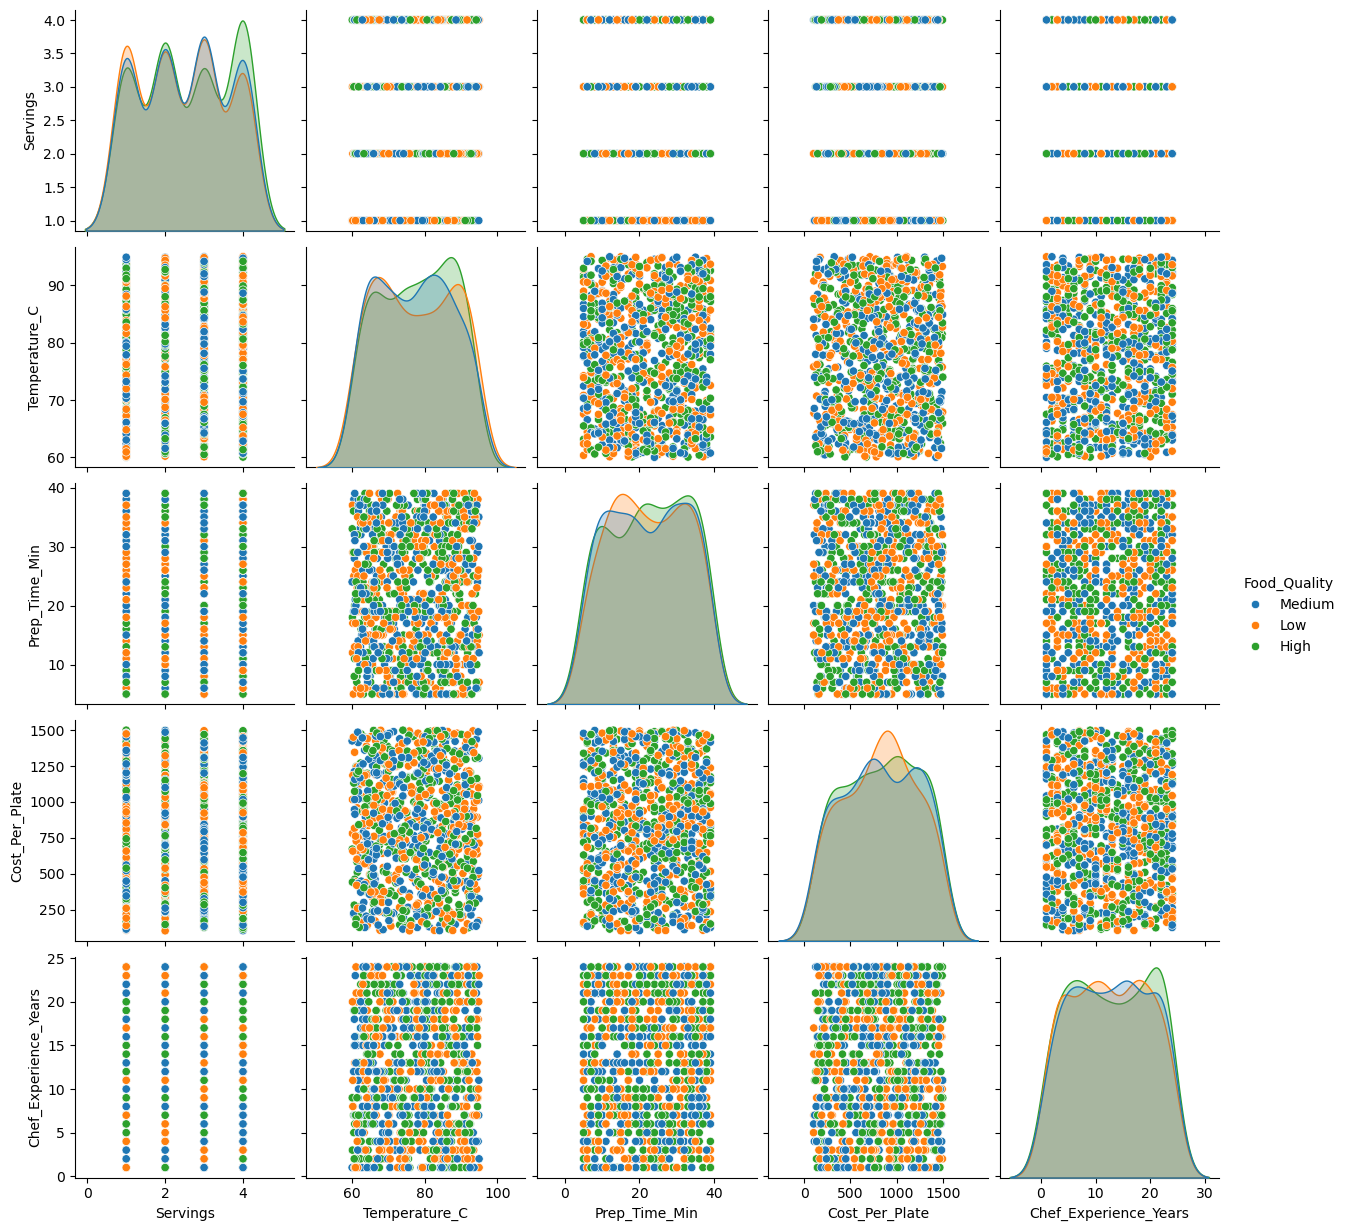

In [31]:
sns.pairplot(df,hue="Food_Quality")

In [35]:
num = df.select_dtypes(include = ["int","float"])

<Axes: >

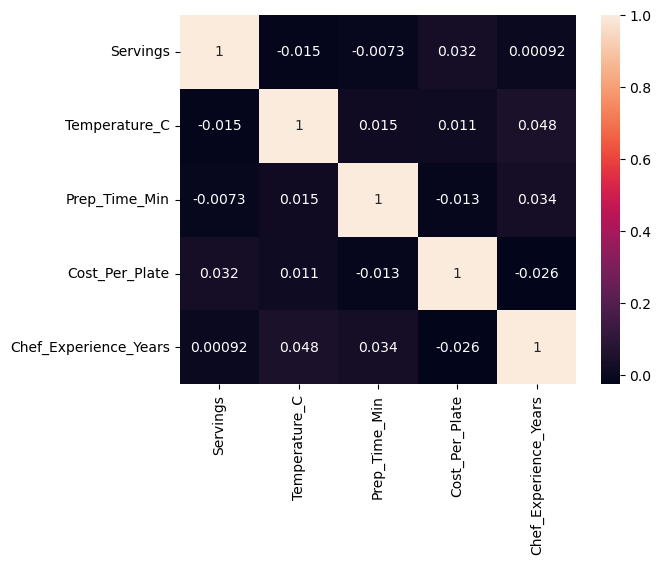

In [36]:
sns.heatmap(num.corr(),annot=True)